<a href="https://colab.research.google.com/github/zahira-07/Estadistica-/blob/main/Conjunto_de_datos_de_cadena_de_suministro_U2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/zahira-07/Estadistica-/refs/heads/main/smart_logistics_dataset.csv")
df.dropna(inplace = True)
df


,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


1- Selecciona una variable dependiente, elimina valores nulos y realiza el encoding.

In [50]:
df.drop(columns=["Timestamp"], inplace= True)
df.head()

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0


In [51]:
df["Asset_ID"].unique()

array(['Truck_6', 'Truck_9', 'Truck_2', 'Truck_10', 'Truck_8', 'Truck_3',
       'Truck_5', 'Truck_4', 'Truck_1', 'Truck_7'], dtype=object)

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1185.003921,131.667102,0.635796,0.766885
Residual,727.0,150554.551031,207.090166,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 Truck_1 Truck_10  -3.2128 0.9518 -11.0087   4.583  False
 Truck_1  Truck_2  -1.3116    1.0  -9.1835  6.5602  False
 Truck_1  Truck_3    1.212    1.0  -6.7138  9.1377  False
 Truck_1  Truck_4  -0.8988    1.0  -8.4764  6.6788  False
 Truck_1  Truck_5  -0.9696    1.0  -8.7655  6.8263  False
 Truck_1  Truck_6   0.6318    1.0  -7.1887  8.4524  False
 Truck_1  Truck_7   1.0687    1.0  -6.8032  8.9405  False
 Truck_1  Truck_8  -1.3324 0.9999  -8.7337  6.0688  False
 Truck_1  Truck_9  -0.0337    1.0  -8.1391  8.0716  False
Truck_10  Truck_2   1.9012 0.9986  -5.6858  9.4882  False
Truck_10  Truck_3   4.4248 0.7111  -3.2181 12.0677  False
Truck_10  Truck_4    2.314 0.9917  -4.9672  9.5952  False
Truck_10  Truck_5   2.2432 0.9948  -5.2648  9.7513  False
Truck_10  Truck_6   3.8447 0.8385  -3.6891 11.3784  False
Truck_10  Truc

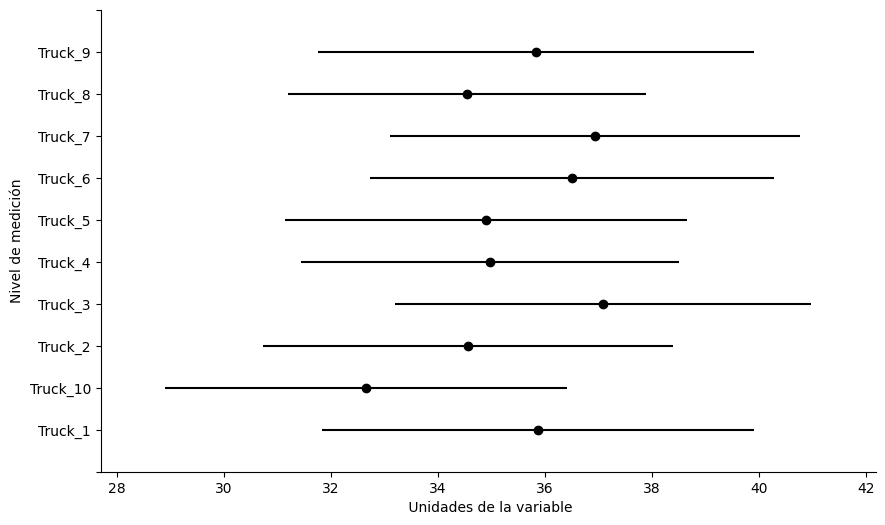

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Asset_ID'],
alpha = nivel_significancia)
tukey.plot_simultaneous(ylabel='Nivel de medición', xlabel=" Unidades de la variable" )
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [54]:
df.drop(columns = ["Asset_ID"], inplace = True)
df


,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


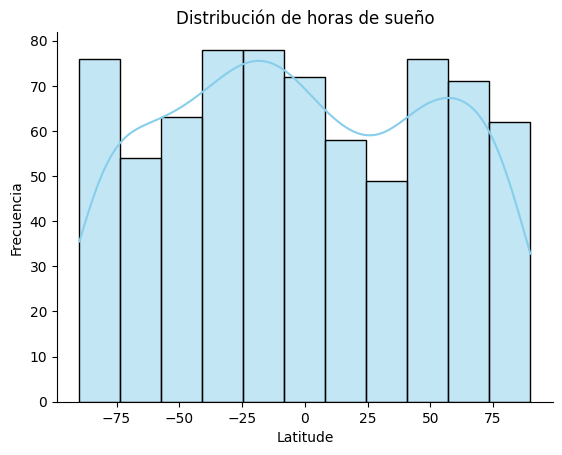

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'skyblue')

plt.xlabel('Latitude')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

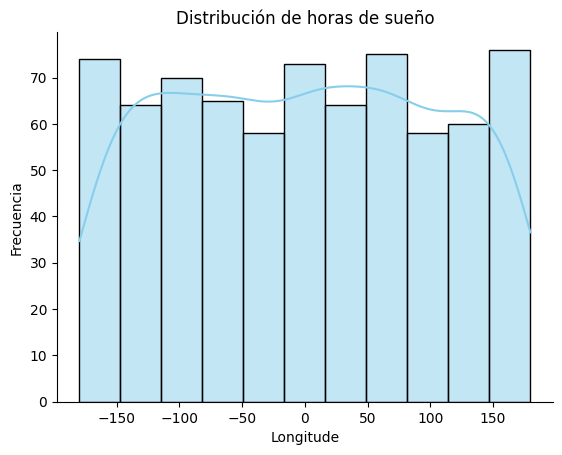

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'skyblue')

plt.xlabel('Longitude')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

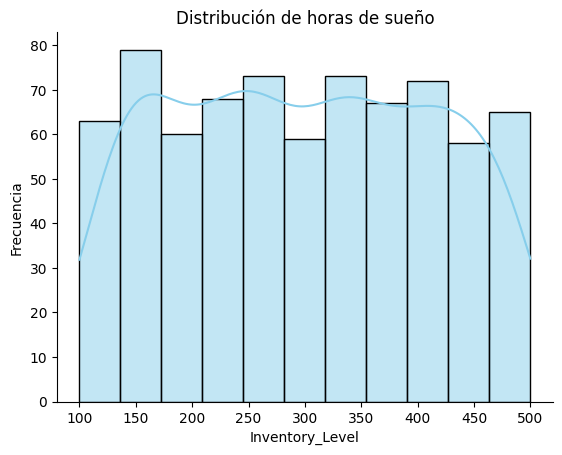

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'skyblue')

plt.xlabel('Inventory_Level')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('	Waiting_Time ~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,208.098709,104.049355,0.504002,0.604317
Residual,734.0,151531.456243,206.446126,NaN,NaN


In [59]:
df.drop(columns=["Shipment_Status"], inplace= True)
df.head()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0


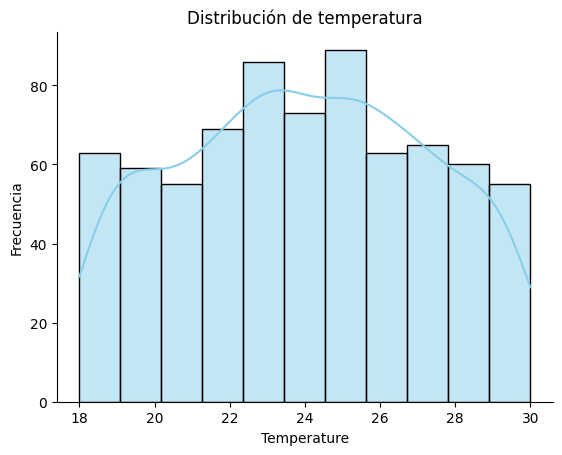

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'skyblue')

plt.xlabel('Temperature')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperatura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

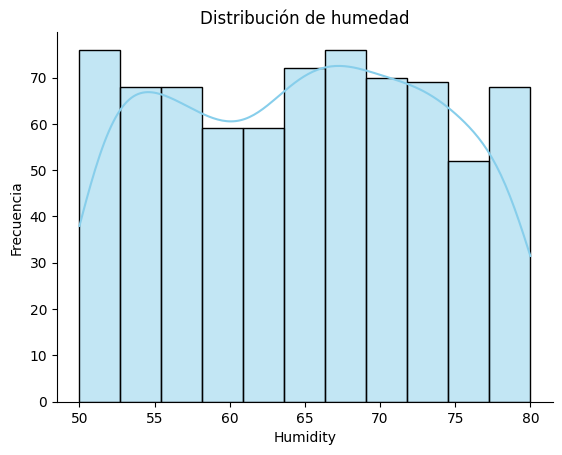

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'skyblue')

plt.xlabel('Humidity')
plt.ylabel('Frecuencia')
plt.title('Distribución de humedad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('	Waiting_Time ~ C(Traffic_Status	)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,168.452231,84.226116,0.407874,0.665213
Residual,734.0,151571.102721,206.500140,NaN,NaN


In [63]:
df.drop(columns=["Traffic_Status"], inplace= True)
df.head()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0


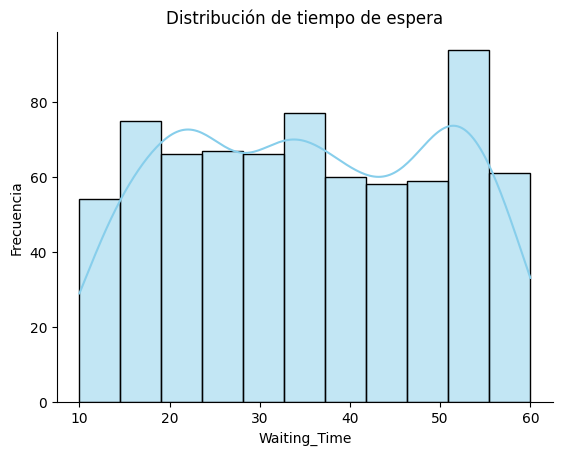

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'skyblue')

plt.xlabel('Waiting_Time')
plt.ylabel('Frecuencia')
plt.title('Distribución de tiempo de espera')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

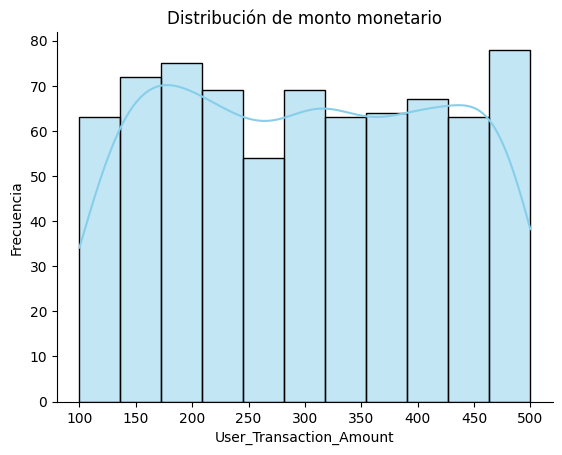

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'skyblue')

plt.xlabel('User_Transaction_Amount')
plt.ylabel('Frecuencia')
plt.title('Distribución de monto monetario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

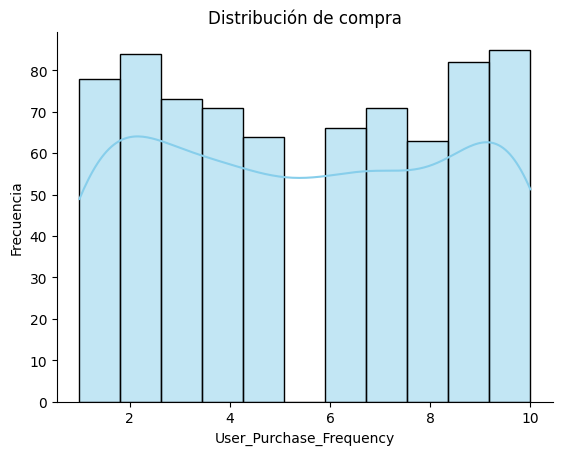

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'skyblue')

plt.xlabel('User_Purchase_Frequency')
plt.ylabel('Frecuencia')
plt.title('Distribución de compra')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('	Waiting_Time ~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,430.598291,215.299145,1.044417,0.352419
Residual,734.0,151308.956662,206.142993,NaN,NaN


In [68]:
df.drop(columns=["Logistics_Delay_Reason"], inplace= True)
df.head()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0


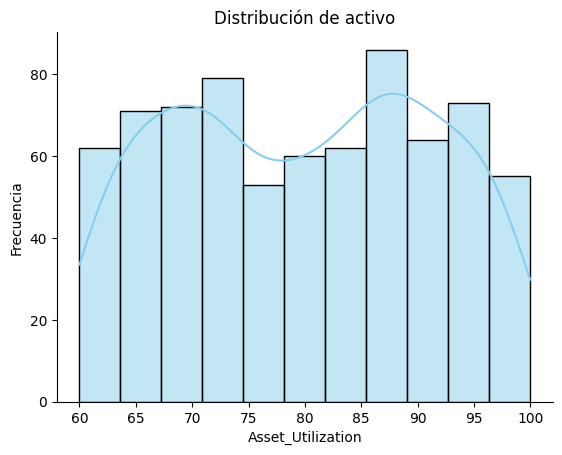

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'skyblue')

plt.xlabel('Asset_Utilization')
plt.ylabel('Frecuencia')
plt.title('Distribución de activo')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

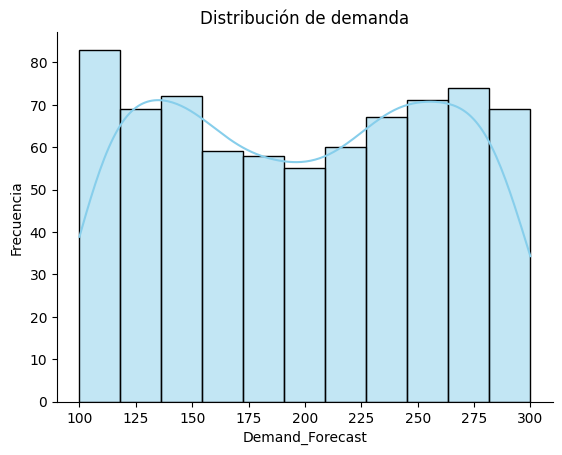

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'skyblue')

plt.xlabel('Demand_Forecast')
plt.ylabel('Frecuencia')
plt.title('Distribución de demanda')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [71]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Logistics_Delay~ C(Waiting_Time)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Waiting_Time),50.0,17.896282,0.357926,1.507348,0.015411
Residual,686.0,162.893406,0.237454,NaN,NaN


In [72]:
df.drop(columns=["Logistics_Delay"], inplace= True)
df.head()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238


2- Obtén la matriz de correlación y realiza un mapa de calor.

Text(0.5, 1.0, 'Matriz de Correlación')

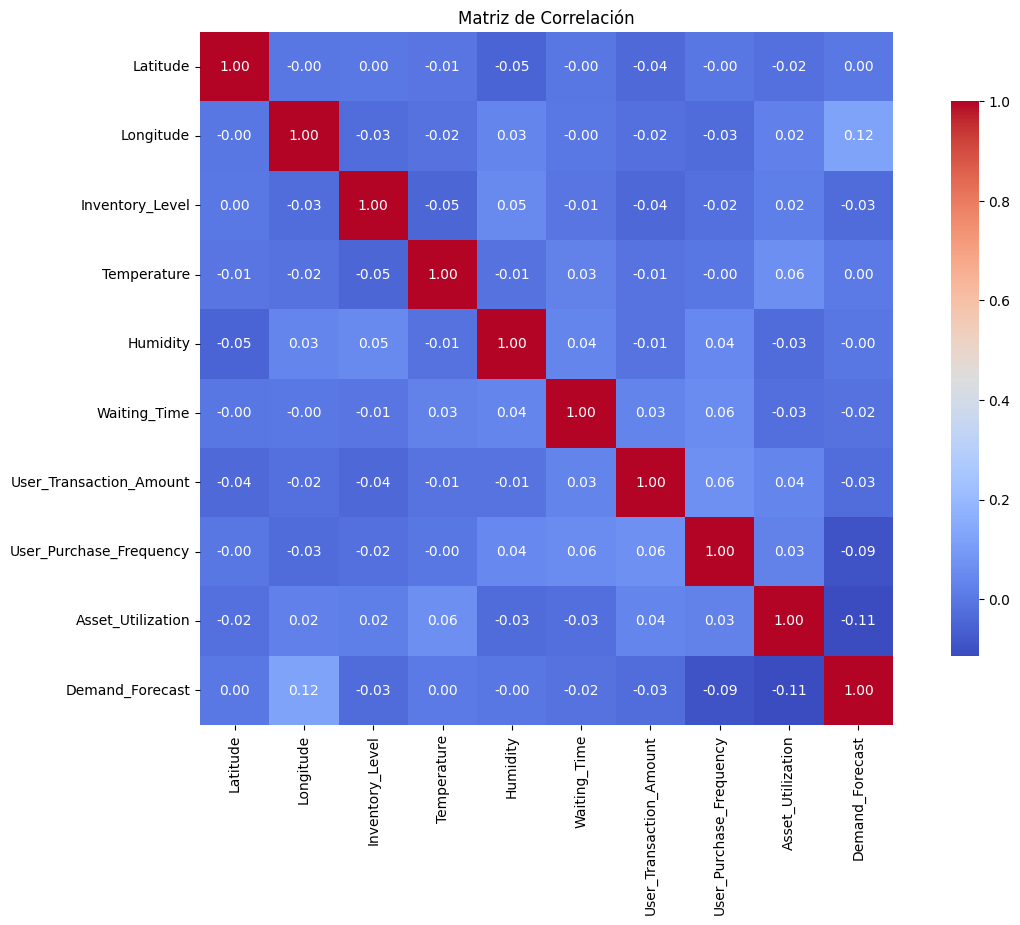

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize=(15, 9))

sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f",
square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')

Coeficiente de correlacion: -0.0462/n


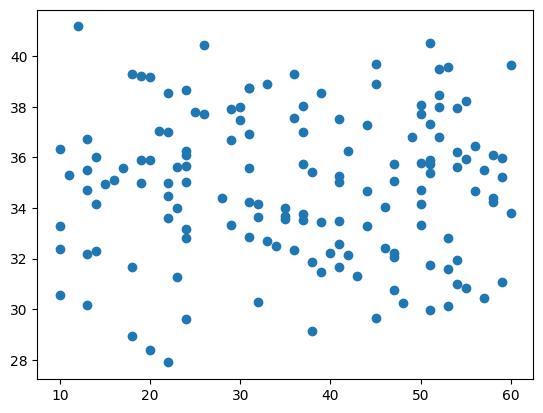

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['Latitude', 'Longitude', 'Inventory_Level', 'Temperature',
'Humidity', 'User_Transaction_Amount', 'User_Purchase_Frequency',
'Asset_Utilization', 'Demand_Forecast']]

Y = df['Waiting_Time']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


constante = 1

modelo = sm.OLS(Y_train, X_train-constante).fit()
Yc=modelo.predict (X_test-constante) # Changed X to X_test
plt.scatter(Y_test,Yc)

r2 = r2_score(Y_test, Yc) # Changed Y to Yc
print(f"Coeficiente de correlacion: {r2:0.4f}/n")

In [75]:
from statsmodels.formula.api import ols

modelo_2 = ols(formula= "Waiting_Time ~ Latitude + Longitude + Inventory_Level +Temperature + Humidity + User_Transaction_Amount + User_Purchase_Frequency+Asset_Utilization + Demand_Forecast", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2) #ANOVA de una via
tabla_anova


,sum_sq,df,F,PR(>F)
Latitude,0.340250,1.0,0.001642,0.967692
Longitude,2.348536,1.0,0.011331,0.915256
Inventory_Level,1.151585,1.0,0.005556,0.940601
Temperature,140.969097,1.0,0.680150,0.409806
Humidity,156.110361,1.0,0.753204,0.385750
User_Transaction_Amount,149.284976,1.0,0.720272,0.396334
User_Purchase_Frequency,391.509323,1.0,1.888960,0.169743
Asset_Utilization,148.570259,1.0,0.716824,0.397466
Demand_Forecast,35.287876,1.0,0.170257,0.680005
Residual,150679.347183,727.0,NaN,NaN


In [76]:
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9 = modelo_2.params
Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8, X9: b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8 + b9*X9
Fun(15,50,50,50,70,2,0,2,22)


40.41145731755542